In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 10
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

선형 판별 분석(Linear Discriminate Analysis, LDA)

선형 판별 분석은 지도 학습적인 접근 방법을 통한 차원 축소 알고리즘으로 선형 판별 분석이라는 말의 뜻은 데이터 포인트가 속사는 클래스를 구분하는 판별 함수가 선형 형태의 함수라는 뜻이다.

데이터 셋의 기존 공간으로 부터 집단간 분산과 집단내 분산의 비율을 최대화하는 기존 공간보다 더 작은 차원의 공간으로 원래 데이터를 투영시킴으로써 차원 축소를 한다. 즉, 데이터를 최대한 분리해주는 기능을 한다.

선형 판별 분석은 크게 3단계 과정을 거친다.  
첫 번째 단계로, 집단간 거리를 계산한다. 이를 집단간 분산이라고 한다.  
두 번째 단계로, 각 집단의 평균과 각 데이터 포인트의 거리를 계산한다. 집단내 분산이라고 한다.  
세 번째 단계로, 기존 데이터 셋의 공간보다 더 작은 차원의 공간을 만드는 것이다. 이 공간은 집단간 분산을 최대화하고 집단내 분산을 최소로 하는 공간이어야 한다.

다른 차원 축소 방법과 비교하기 위해 와인 데이터를 이용한다.

In [2]:
# 데이터 불러오기
raw_data = datasets.load_wine() # 사이킷런이 제공하는 와인 데이터를 불러온다.

# 피쳐, 레이블 데이터 저장
xData = raw_data.data # 피쳐 데이터를 저장한다.
yData = raw_data.target # 피쳐 데이터에 따른 레이블을 저장한다.
print(xData.shape, yData.shape)

# 학습 데이터와 테스트 데이터로 분할
x_train, x_test, y_train, y_test = train_test_split(xData, yData, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

# 데이터 표준화
std_scale = StandardScaler() # 표준화 스케일러 객체를 만든다.
x_train = std_scale.fit_transform(x_train) # 학습 데이터를 스케일러로 표준화 하고 적용한다.
x_test = std_scale.transform(x_test) # 테스트 데이터를 학습 데이터로 표준화 스케일러에 적용한다.

(178, 13) (178,)
(133, 13) (45, 13) (133,) (45,)


선형 판별 분석을 통한 차원 축소

In [19]:
# 선형 판별 분석 알고리즘을 사용하기 위해 import 한다.
from sklearn.discriminant_analysis import  LinearDiscriminantAnalysis
# n_components 속성에 축소할 차원의 크기를 지정해서 선형 판별 분석 모델을 만든다.
# n_components 속성에 사용 가능한 값은 기본값인 min(피쳐 개수, 클래스 개수 - 1)보다 큰 값을 지정할 수 없다.
# 와인 데이터의 피쳐는 13개이고 클래스의 3개 이므로 n_components 속성값은 min(13, 3 - 1)의 결과인 2보다
# 큰 값을 지정하면 에러가 발생된다.
# n_components 속성 생략시 2차원으로 줄어들고 n_components 속성값을 1로 설정하면 1차원으로 줄어든다.
lda = LinearDiscriminantAnalysis(n_components=2)

# lda.fit(x_train, y_train) # 학습 데이터와 학습 데이터의 레이블로 선형 판별 분석 모델을 학습시킨다.
# x_train_lda = lda.transform(x_train) # 학습된 선형 판별 분석 모델에 학습 데이터를 적용시킨다.
x_train_lda = lda.fit_transform(x_train, y_train)
# 학습은 학습 데이터로만 해야하고 테스트 데이터는 학습 데이터로 학습된 결과에 적용만 시킨다.
x_test_lda = lda.transform(x_test)

# 차원 축소 이전 데이터의 차원을 확인하면 차원 축소전의 피쳐 데이터는 13차원의 데이터 133개로 구성되어 있음을
# 알 수 있고 주성분 분석을 이용해 차원 축소한 데이터는 2차원 데이터 133개로 구성되어 있음을 알 수 있다.
print(x_train_lda.shape, x_test_lda.shape)

(133, 2) (45, 2)


In [21]:
# 선형 판별 분석 상수항을 확인한다.
# intercept_속성으로 상수항을 확인할 수 있다.
print(lda.intercept_)

[ -9.49063922  -3.6792656  -10.65310672]


In [23]:
# 선형 판별 분석 가중 벡터를 확인한다.
# coef_ 속성으로 가중 벡터를 확인할 수 있다.
print(lda.coef_)

[[ 2.11536841  0.34171834  1.60756274 -2.62777005 -0.02954383 -1.92461007
   5.43612614  0.30142527 -0.66723405 -2.08948728  0.53569108  3.06011656
   5.45318503]
 [-1.18707715 -0.97635273 -1.64104916  1.19614378  0.22114803  0.2969019
   1.13721801  0.4338713   0.33425086 -1.57541361  0.56544507 -0.17730553
  -2.34856045]
 [-0.59547207  1.01875252  0.59754164  1.13544231 -0.28238675  1.65463974
  -7.48134065 -0.94177595  0.24492236  4.49319245 -1.38150969 -3.04974421
  -2.54627163]]


선형 판별 분석을 통해 차원 축소된 데이터 시각화

In [24]:
# 차원 축소된 데이터 시각화를 위해 데이터프레임을 만든다.
x_train_df = pd.DataFrame(x_train_lda, columns=['lda_comp1', 'lda_comp2'])
x_train_df['label'] = y_train
x_train_df

,lda_comp1,lda_comp2,label
0,2.563293,-0.503212,0
1,0.646015,-2.169761,1
2,3.981901,1.621584,0
3,5.956216,3.878140,0
4,4.047839,2.335699,0
...,...,...,...
128,-3.519877,0.440679,2
129,-4.457515,0.491287,2
130,-0.639263,-1.684700,1
131,-2.440212,1.168633,2


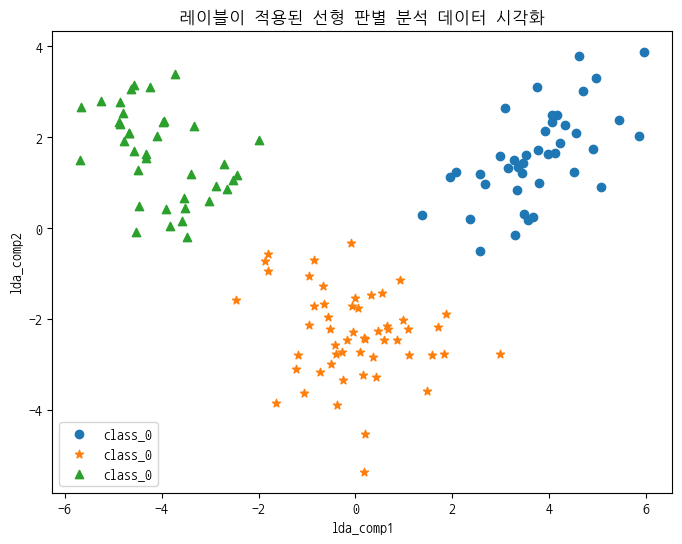

In [26]:
plt.figure(figsize=(8, 6))
markers = ['o', '*', '^']

for index, marker in enumerate(markers):
    df_index = x_train_df[x_train_df.label == index] # 레이블 별로 데이터를 분할한다.
    x = df_index.lda_comp1 # 레이블 별로 분할된 데이터의 첫 번째 주성분 벡터를 추출한다.
    y = df_index.lda_comp2 # 레이블 별로 분할된 데이터의 두 번째 주성분 벡터를 추출한다.
    label = raw_data.target_names[0] # 레이블 이름을 지정한다.
    plt.scatter(x=x, y=y, marker=marker, label=label) # 산포도를 그린다.

plt.title('레이블이 적용된 선형 판별 분석 데이터 시각화')
plt.xlabel('lda_comp1')
plt.ylabel('lda_comp2')
plt.legend()
plt.show()

선형 판별 분석 적용 전 데이터 학습

In [27]:
# 모델 생성 후 데이터 학습
from sklearn.ensemble import RandomForestClassifier # 앙상블 랜덤 포레스트 알고리즘을 사용하기 위해 import 한다.
# 앙상블의 랜덤 포레스트도 모델을 만든다.
clf = RandomForestClassifier(max_depth=2, random_state=0)
# 표준화된 학습 데이터와 학습 데이터에 따른 레이블 데이터로 앙상블 랜덤 포레스트 모델을 학습시킨다.
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [28]:
# predict() 메소드의 인수로 표준화된 테스트 데이터를 넘겨서 예측한다.
predict = clf.predict(x_test)
print(predict)

[2 1 0 1 0 2 1 0 2 1 0 0 1 0 1 1 2 0 1 0 0 1 2 0 0 2 0 0 0 2 1 2 2 0 1 1 1
 1 1 0 0 1 2 0 0]


In [29]:
# 혼동 행렬
# confusion_matrix() 메소드의 인수를 테스트 데이터의 실제값, 예측값 순서로 넘겨서 혼동 행렬를 만든다.
conf_matrix = confusion_matrix(y_test, predict)
print(conf_matrix)

[[18  0  0]
 [ 1 16  0]
 [ 0  0 10]]


In [30]:
# 분류 리포트
# classification_report() 메소드의 인수를 테스트 데이터의 실제값, 예측값 순서로 넘겨서 분류 리포트를 만든다.
# target_names 속성으로 분류 리포트에 레이블의 실제값을 출력할 수 있다.
# class_report = classification_report(y_test, predict, target_names=raw_data.target_names) 
class_report = classification_report(y_test, predict, target_names=['A', 'B', 'C']) 
print(class_report)

              precision    recall  f1-score   support

           A       0.95      1.00      0.97        18
           B       1.00      0.94      0.97        17
           C       1.00      1.00      1.00        10

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



선형 판별 분석 적용 후 데이터 학습

In [31]:
# 표준화된 학습 데이터를 주성분 분석을 적용한 데이터와 학습 데이터에 따른 레이블 데이터를 앙상블 랜덤 포레스트 모델을 학습시킨다.
clf.fit(x_train_lda, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [33]:
# predict() 메소드의 인수로 표준화된 테스트 데이터를 넘겨서 예측한다.
predict = clf.predict(x_test_lda)
print(predict)

[2 1 0 1 0 2 1 0 2 1 0 0 1 0 1 1 2 0 1 0 0 1 2 1 0 2 0 0 0 2 1 2 2 0 1 1 1
 1 1 0 0 1 2 0 0]


In [34]:
# 혼동 행렬
# confusion_matrix() 메소드의 인수를 테스트 데이터의 실제값, 예측값 순서로 넘겨서 혼동 행렬를 만든다.
conf_matrix = confusion_matrix(y_test, predict)
print(conf_matrix)

[[18  0  0]
 [ 0 17  0]
 [ 0  0 10]]


In [35]:
# 분류 리포트
# classification_report() 메소드의 인수를 테스트 데이터의 실제값, 예측값 순서로 넘겨서 분류 리포트를 만든다.
# target_names 속성으로 분류 리포트에 레이블의 실제값을 출력할 수 있다.
# class_report = classification_report(y_test, predict, target_names=raw_data.target_names) 
class_report = classification_report(y_test, predict, target_names=['A', 'B', 'C']) 
print(class_report)

              precision    recall  f1-score   support

           A       1.00      1.00      1.00        18
           B       1.00      1.00      1.00        17
           C       1.00      1.00      1.00        10

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

